# Data analysis: Digital
### October 26th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 26/10/2021




## Configuration

### Clone the GIT

In [ ]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

### Install environment

In [ ]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

### Importa moduli [COLAB]

In [2]:
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle #Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### Importa moduli [no COLAB]

In [4]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

Welcome to JupyROOT 6.24/06


In [5]:
import csv

def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

In [213]:
time_div = 0.01 #s
clock_fq = 5   #Hz
clk = 1./clock_fq

timebase = np.linspace(time_div * -5., time_div * 5., 2500)

def plotLogicLevel(ch1, ch1_name, ch2, ch2_name, ch3, ch3_name, timebase, clock_fq = 5, time_div = 0.1):
   clockwf  = signal.square(2 * np.pi * clock_fq * timebase)
   fig, ax  = plt.subplots(figsize=(8,6))
   ax.plot(timebase, clockwf * 0.5 - 2.5, color="blue", linewidth=2.5)
   ax.plot(timebase, ch3 - 1, color="black", linewidth=2.5)
   ax.plot(timebase, ch2 + 1, color="black", linewidth=2.5)
   ax.plot(timebase, ch1 + 3, color="black", linewidth=2.5)
   ax.get_yaxis().set_visible(False)
   plt.xlabel("Base dei tempi (s)")
   plt.xlim([time_div * -5., time_div * 5.])
   plt.ylim([-3.5,  5])
   plt.title("Livelli logici - $f_{clk}$ = " + str(clock_fq) + " Hz")
   
   #ax.hlines(-2, -0.6, 0.6, color = "black", linestyle="--")
   #ax.hlines(-3, -0.6, 0.6, color = "black", linestyle="--")
   ax.fill_between(timebase, -2, -3, color="lightgray")
   ax.text(-0.47,-2 + 0.3, "Clock", fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.fill_between(timebase, -1, +0, color="lightgray")
   ax.text(-0.47, + 0.3, ch3_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.fill_between(timebase, +1, +2, color="lightgray")
   ax.text(-0.47, +2 + 0.3, ch2_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.fill_between(timebase, +3, +4, color="lightgray")
   ax.text(-0.47, +4 + 0.3, ch1_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.grid()
   return ax

def plotLogicLevelNoClock_3ch(ch1, ch1_name, ch2, ch2_name, ch3, ch3_name, ch4, ch4_name, timebase, time_div = 0.1, titl = "Livelli logici"):
    fig, ax  = plt.subplots(figsize=(8,6))
    #ax.plot(timebase, ch4 - 3, color="black", linewidth=2.5)
    ax.plot(timebase, ch3 - 1, color="blue", linewidth=2.5)
    ax.plot(timebase, ch2 + 1, color="red", linewidth=2.5)
    ax.plot(timebase, ch1 + 3, color="red", linewidth=2.5)
    ax.get_yaxis().set_visible(False)
    plt.xlabel("Base dei tempi (s)")
    plt.xlim([time_div * -5., time_div * 5.])
    plt.ylim([-1.5,  5])
    plt.title(titl)
    
    #ax.hlines(-2, -0.6, 0.6, color = "black", linestyle="--")
    #ax.hlines(-3, -0.6, 0.6, color = "black", linestyle="--")
    #ax.fill_between(timebase, -2, -3, color="lightgray")
    #ax.text(-0.47,-2 + 0.3, "$\overline{Q}$", fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.fill_between(timebase, -1, +0, color="lightgray")
    ax.text(-0.23, + 0.3, ch3_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.fill_between(timebase, +1, +2, color="lightgray")
    ax.text(-0.23, +2 + 0.3, ch2_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.fill_between(timebase, +3, +4, color="lightgray")
    ax.text(-0.23, +4 + 0.3, ch1_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.grid()
    return ax

def plotLogicLevelNoClock(ch1, ch1_name, ch2, ch2_name, ch3, ch3_name, ch4, ch4_name, timebase, time_in, time_out, titl = "Livelli logici"):
    fig, ax  = plt.subplots(figsize=(8,6))
    ax.plot(timebase, ch4 - 3, color="black", linewidth=2.5)
    ax.plot(timebase, ch3 - 1, color="blue", linewidth=2.5)
    ax.plot(timebase, ch2 + 1, color="red", linewidth=2.5)
    ax.plot(timebase, ch1 + 3, color="red", linewidth=2.5)
    ax.get_yaxis().set_visible(False)
    plt.xlabel("Base dei tempi (s)")
    plt.xlim([time_in, time_out])
    plt.ylim([-3.5,  5])
    plt.title(titl)
    
    #ax.hlines(-2, -0.6, 0.6, color = "black", linestyle="--")
    #ax.hlines(-3, -0.6, 0.6, color = "black", linestyle="--")
    ax.fill_between(timebase, -2, -3, color="lightgray")
    ax.text(.95*time_in,-2 + 0.3, ch4_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.fill_between(timebase, -1, +0, color="lightgray")
    ax.text(.95*time_in, + 0.3, ch3_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.fill_between(timebase, +1, +2, color="lightgray")
    ax.text(.95*time_in, +2 + 0.3, ch2_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.fill_between(timebase, +3, +4, color="lightgray")
    ax.text(.95*time_in, +4 + 0.3, ch1_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.grid()
    return ax

### AND

#### AND Gate

In [214]:
CH1_and = openTek(f'{DATADIR}/26-10-21/ALL0000/F0000CH1.CSV')
CH2_and = openTek(f'{DATADIR}/26-10-21/ALL0000/F0000CH2.CSV')
CH3_and = openTek(f'{DATADIR}/26-10-21/ALL0000/F0000CH3.CSV')

time_1_and = CH1_and['Data'].to_numpy().transpose()[0]   
sig_1_and = CH1_and['Data'].to_numpy().transpose()[1]  
time_2_and = CH2_and['Data'].to_numpy().transpose()[0]   
sig_2_and = CH2_and['Data'].to_numpy().transpose()[1]
time_3_and = CH3_and['Data'].to_numpy().transpose()[0]   
sig_3_and = CH3_and['Data'].to_numpy().transpose()[1]

CH1_and2 = openTek(f'{DATADIR}/26-10-21/ALL0001/F0001CH1.CSV')
CH2_and2 = openTek(f'{DATADIR}/26-10-21/ALL0001/F0001CH2.CSV')
CH3_and2 = openTek(f'{DATADIR}/26-10-21/ALL0001/F0001CH3.CSV')

time_1_and2 = CH1_and2['Data'].to_numpy().transpose()[0]   
sig_1_and2 = CH1_and2['Data'].to_numpy().transpose()[1]  
time_2_and2 = CH2_and2['Data'].to_numpy().transpose()[0]   
sig_2_and2 = CH2_and2['Data'].to_numpy().transpose()[1]
time_3_and2 = CH3_and2['Data'].to_numpy().transpose()[0]   
sig_3_and2 = CH3_and2['Data'].to_numpy().transpose()[1]

<AxesSubplot:title={'center':'livelli logici AND'}, xlabel='Base dei tempi (s)'>

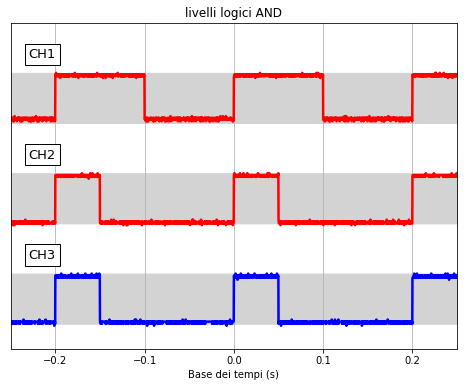

In [215]:
plotLogicLevelNoClock_3ch(sig_1_and/sig_1_and.max(), "CH1", sig_2_and/sig_2_and.max(), "CH2", sig_3_and/sig_3_and.max(), "CH3", np.zeros(2500), "$\overline{Q}$", 
                            time_1_and, time_div = 0.05, 
                            titl = 'livelli logici AND')

<AxesSubplot:title={'center':'livelli logici AND'}, xlabel='Base dei tempi (s)'>

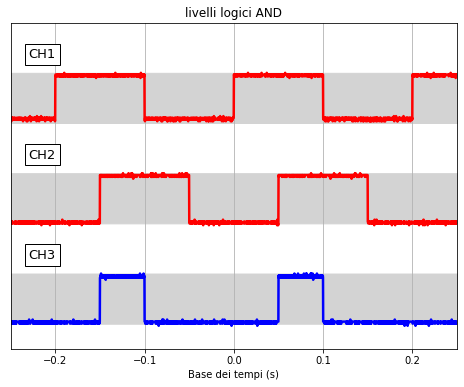

In [216]:
plotLogicLevelNoClock_3ch(sig_1_and2/sig_1_and2.max(), "CH1", sig_2_and2/sig_2_and2.max(), "CH2", sig_3_and2/sig_3_and2.max(), "CH3", np.zeros(2500), "$\overline{Q}$", 
                            time_1_and2, time_div = 0.05, 
                            titl = 'livelli logici AND')

#### AND Switching

In [217]:
CH1_and3 = openTek(f'{DATADIR}/26-10-21/ALL0002/F0002CH1.CSV')
CH2_and3 = openTek(f'{DATADIR}/26-10-21/ALL0002/F0002CH2.CSV')

time_1_and3 = CH1_and3['Data'].to_numpy().transpose()[0]   
sig_1_and3 = CH1_and3['Data'].to_numpy().transpose()[1]  
time_2_and3 = CH2_and3['Data'].to_numpy().transpose()[0]   
sig_2_and3 = CH2_and3['Data'].to_numpy().transpose()[1]


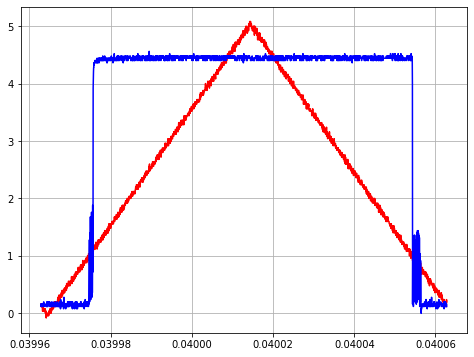

In [218]:
fig, ax  = plt.subplots(figsize=(8,6))
ax.plot(time_1_and3, sig_1_and3, color = "red", label = "Step")
ax.plot(time_2_and3, sig_2_and3, color = "blue", label = "Step")
ax.grid()


In [219]:
CH1_and4 = openTek(f'{DATADIR}/26-10-21/AND-switching2/F0003CH1.CSV')
CH2_and4 = openTek(f'{DATADIR}/26-10-21/AND-switching2/F0003CH2.CSV')

time_1_and4 = CH1_and4['Data'].to_numpy().transpose()[0]   
sig_1_and4 = CH1_and4['Data'].to_numpy().transpose()[1]  
time_2_and4 = CH2_and4['Data'].to_numpy().transpose()[0]   
sig_2_and4 = CH2_and4['Data'].to_numpy().transpose()[1]


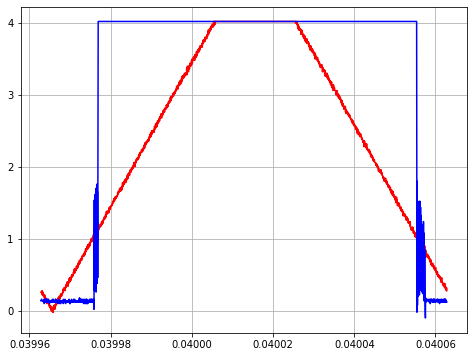

In [220]:
fig, ax  = plt.subplots(figsize=(8,6))
ax.plot(time_1_and4, sig_1_and4, color = "red", label = "Step")
ax.plot(time_2_and4, sig_2_and4, color = "blue", label = "Step")
ax.grid()


### J/K

#### J (square wave)  K (ground)

In [221]:
CH1_jk = openTek(f'{DATADIR}/26-10-21/ALL0004/F0004CH1.CSV')
CH2_jk = openTek(f'{DATADIR}/26-10-21/ALL0004/F0004CH2.CSV')
CH3_jk = openTek(f'{DATADIR}/26-10-21/ALL0004/F0004CH3.CSV')
CH4_jk = openTek(f'{DATADIR}/26-10-21/ALL0004/F0004CH4.CSV')

time_1_jk = CH1_jk['Data'].to_numpy().transpose()[0]   
sig_1_jk = CH1_jk['Data'].to_numpy().transpose()[1]  
time_2_jk = CH2_jk['Data'].to_numpy().transpose()[0]   
sig_2_jk = CH2_jk['Data'].to_numpy().transpose()[1]
time_3_jk = CH3_jk['Data'].to_numpy().transpose()[0]   
sig_3_jk = CH3_jk['Data'].to_numpy().transpose()[1]
time_4_jk = CH4_jk['Data'].to_numpy().transpose()[0]   
sig_4_jk = CH4_jk['Data'].to_numpy().transpose()[1]


<AxesSubplot:title={'center':'livelli logici JK'}, xlabel='Base dei tempi (s)'>

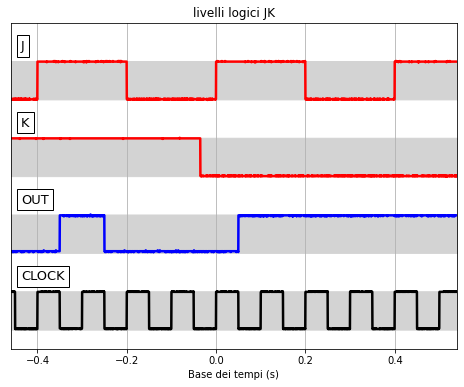

In [222]:
plotLogicLevelNoClock(sig_1_jk/sig_1_jk.max(), "J", sig_2_jk/sig_2_jk.max(), "K", sig_3_jk/sig_3_jk.max(), "OUT", sig_4_jk/sig_4_jk.max(), "CLOCK", 
                            time_1_jk, time_1_jk[0],time_1_jk[len(time_1_jk)-1], titl = 'livelli logici JK')

#### J (ground)  K (square wave)

In [223]:
CH1_jk2 = openTek(f'{DATADIR}/26-10-21/ALL0005/F0005CH1.CSV')
CH2_jk2 = openTek(f'{DATADIR}/26-10-21/ALL0005/F0005CH2.CSV')
CH3_jk2 = openTek(f'{DATADIR}/26-10-21/ALL0005/F0005CH3.CSV')
CH4_jk2 = openTek(f'{DATADIR}/26-10-21/ALL0005/F0005CH4.CSV')

time_1_jk2 = CH1_jk2['Data'].to_numpy().transpose()[0]   
sig_1_jk2 = CH1_jk2['Data'].to_numpy().transpose()[1]  
time_2_jk2 = CH2_jk2['Data'].to_numpy().transpose()[0]   
sig_2_jk2 = CH2_jk2['Data'].to_numpy().transpose()[1]
time_3_jk2 = CH3_jk2['Data'].to_numpy().transpose()[0]   
sig_3_jk2 = CH3_jk2['Data'].to_numpy().transpose()[1]
time_4_jk2 = CH4_jk2['Data'].to_numpy().transpose()[0]   
sig_4_jk2 = CH4_jk2['Data'].to_numpy().transpose()[1]


<AxesSubplot:title={'center':'livelli logici JK'}, xlabel='Base dei tempi (s)'>

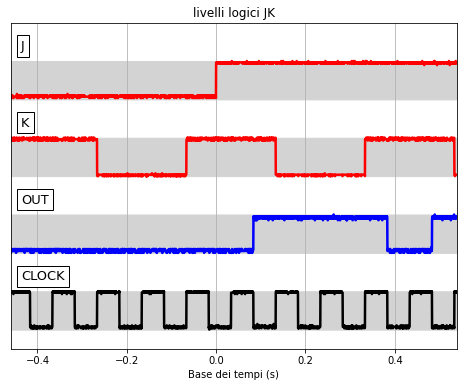

In [224]:
plotLogicLevelNoClock(sig_1_jk2/sig_1_jk2.max(), "J", sig_2_jk2/sig_2_jk2.max(), "K", sig_3_jk2/sig_3_jk2.max(), "OUT", sig_4_jk2/sig_4_jk2.max(), "CLOCK", 
                            time_1_jk2,time_1_jk2[0], time_1_jk2[len(time_1_jk2)-1], titl = 'livelli logici JK')

#### J K (parallel square waves)

In [225]:
CH1_jk3 = openTek(f'{DATADIR}/26-10-21/ALL0006/F0006CH1.CSV')
CH2_jk3 = openTek(f'{DATADIR}/26-10-21/ALL0006/F0006CH2.CSV')
CH3_jk3 = openTek(f'{DATADIR}/26-10-21/ALL0006/F0006CH3.CSV')
CH4_jk3 = openTek(f'{DATADIR}/26-10-21/ALL0006/F0006CH4.CSV')

time_1_jk3 = CH1_jk3['Data'].to_numpy().transpose()[0]   
sig_1_jk3 = CH1_jk3['Data'].to_numpy().transpose()[1]  
time_2_jk3 = CH2_jk3['Data'].to_numpy().transpose()[0]   
sig_2_jk3 = CH2_jk3['Data'].to_numpy().transpose()[1]
time_3_jk3 = CH3_jk3['Data'].to_numpy().transpose()[0]   
sig_3_jk3 = CH3_jk3['Data'].to_numpy().transpose()[1]
time_4_jk3 = CH4_jk3['Data'].to_numpy().transpose()[0]   
sig_4_jk3 = CH4_jk3['Data'].to_numpy().transpose()[1]


<AxesSubplot:title={'center':'livelli logici JK'}, xlabel='Base dei tempi (s)'>

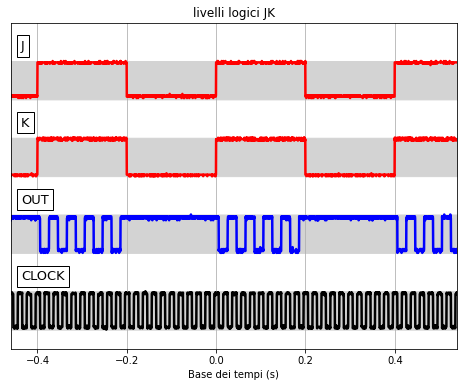

In [226]:
plotLogicLevelNoClock(sig_1_jk3/sig_1_jk3.max(), "J", sig_2_jk3/sig_2_jk3.max(), "K", sig_3_jk3/sig_3_jk3.max(), "OUT", sig_4_jk3/sig_4_jk3.max(), "CLOCK", 
                            time_1_jk3,time_1_jk3[0], time_1_jk3[len(time_1_jk3)-1], titl = 'livelli logici JK')

### DAC (Without OPAs)

#### With memory

In [227]:
CH1_D = openTek(f'{DATADIR}/26-10-21/ALL0007/F0007CH1.CSV')
CH2_D = openTek(f'{DATADIR}/26-10-21/ALL0007/F0007CH2.CSV')
CH3_D = openTek(f'{DATADIR}/26-10-21/ALL0007/F0007CH3.CSV')
CH4_D = openTek(f'{DATADIR}/26-10-21/ALL0007/F0007CH4.CSV')

time_1_D = CH1_D['Data'].to_numpy().transpose()[0]   
sig_1_D = CH1_D['Data'].to_numpy().transpose()[1]  
time_2_D = CH2_D['Data'].to_numpy().transpose()[0]   
sig_2_D = CH2_D['Data'].to_numpy().transpose()[1]
time_3_D = CH3_D['Data'].to_numpy().transpose()[0]   
sig_3_D = CH3_D['Data'].to_numpy().transpose()[1]
time_4_D = CH4_D['Data'].to_numpy().transpose()[0]   
sig_4_D = CH4_D['Data'].to_numpy().transpose()[1]


<AxesSubplot:title={'center':'bit output'}, xlabel='Base dei tempi (s)'>

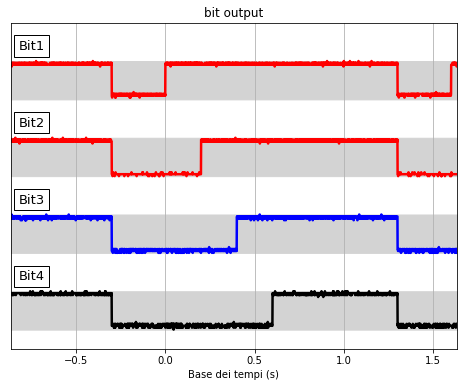

In [239]:
plotLogicLevelNoClock(sig_1_D/sig_1_D.max(), "Bit1", sig_2_D/sig_2_D.max(), "Bit2", sig_3_D/sig_3_D.max(), "Bit3", sig_4_D/sig_4_D.max(), "Bit4", 
                            time_1_D,time_1_D[0], time_1_D[len(time_1_D)-1], titl = 'bit output')

#### With clock

In [240]:
CH1_D2 = openTek(f'{DATADIR}/26-10-21/ALL0008/F0008CH1.CSV')
CH2_D2 = openTek(f'{DATADIR}/26-10-21/ALL0008/F0008CH2.CSV')
CH3_D2 = openTek(f'{DATADIR}/26-10-21/ALL0008/F0008CH3.CSV')
CH4_D2 = openTek(f'{DATADIR}/26-10-21/ALL0008/F0008CH4.CSV')

time_1_D2 = CH1_D2['Data'].to_numpy().transpose()[0]   
sig_1_D2 = CH1_D2['Data'].to_numpy().transpose()[1]  
time_2_D2 = CH2_D2['Data'].to_numpy().transpose()[0]   
sig_2_D2 = CH2_D2['Data'].to_numpy().transpose()[1]
time_3_D2 = CH3_D2['Data'].to_numpy().transpose()[0]   
sig_3_D2 = CH3_D2['Data'].to_numpy().transpose()[1]
time_4_D2 = CH4_D2['Data'].to_numpy().transpose()[0]   
sig_4_D2 = CH4_D2['Data'].to_numpy().transpose()[1]


<AxesSubplot:title={'center':'bit output'}, xlabel='Base dei tempi (s)'>

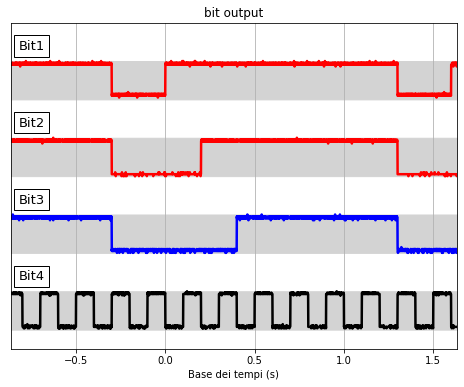

In [241]:
plotLogicLevelNoClock(sig_1_D2/sig_1_D2.max(), "Bit1", sig_2_D2/sig_2_D2.max(), "Bit2", sig_3_D2/sig_3_D2.max(), "Bit3", sig_4_D2/sig_4_D2.max(), "Bit4", 
                            time_1_D2,time_1_D2[0], time_1_D2[len(time_1_D2)-1], titl = 'bit output')

#### Shifting with clk

In [233]:
CH1_D3 = openTek(f'{DATADIR}/26-10-21/ALL0009/F0009CH1.CSV')
CH2_D3 = openTek(f'{DATADIR}/26-10-21/ALL0009/F0009CH2.CSV')
CH3_D3 = openTek(f'{DATADIR}/26-10-21/ALL0009/F0009CH3.CSV')
CH4_D3 = openTek(f'{DATADIR}/26-10-21/ALL0009/F0009CH4.CSV')

time_1_D3 = CH1_D3['Data'].to_numpy().transpose()[0]   
sig_1_D3 = CH1_D3['Data'].to_numpy().transpose()[1]  
time_2_D3 = CH2_D3['Data'].to_numpy().transpose()[0]   
sig_2_D3 = CH2_D3['Data'].to_numpy().transpose()[1]
time_3_D3 = CH3_D3['Data'].to_numpy().transpose()[0]   
sig_3_D3 = CH3_D3['Data'].to_numpy().transpose()[1]
time_4_D3= CH4_D3['Data'].to_numpy().transpose()[0]   
sig_4_D3 = CH4_D3['Data'].to_numpy().transpose()[1]


<AxesSubplot:title={'center':'bit output'}, xlabel='Base dei tempi (s)'>

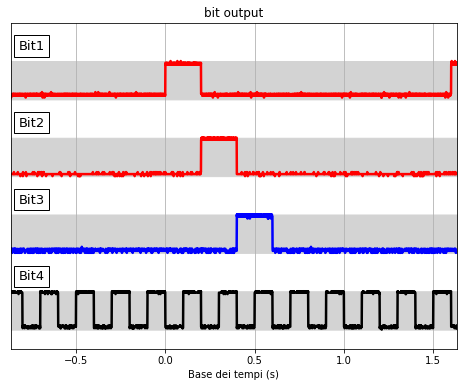

In [242]:
plotLogicLevelNoClock(sig_1_D3/sig_1_D3.max(), "Bit1", sig_2_D3/sig_2_D3.max(), "Bit2", sig_3_D3/sig_3_D3.max(), "Bit3", sig_4_D3/sig_4_D3.max(), "Bit4", 
                            time_1_D3,time_1_D3[0], time_1_D3[len(time_1_D3)-1], titl = 'bit output')

#### With transistor

In [235]:
CH1_D4 = openTek(f'{DATADIR}/26-10-21/ALL0010/F0010CH1.CSV')
CH2_D4 = openTek(f'{DATADIR}/26-10-21/ALL0010/F0010CH2.CSV')
CH3_D4 = openTek(f'{DATADIR}/26-10-21/ALL0010/F0010CH3.CSV')
CH4_D4 = openTek(f'{DATADIR}/26-10-21/ALL0010/F0010CH4.CSV')

time_1_D4 = CH1_D4['Data'].to_numpy().transpose()[0]   
sig_1_D4 = CH1_D4['Data'].to_numpy().transpose()[1]  
time_2_D4 = CH2_D4['Data'].to_numpy().transpose()[0]   
sig_2_D4 = CH2_D4['Data'].to_numpy().transpose()[1]
time_3_D4 = CH3_D4['Data'].to_numpy().transpose()[0]   
sig_3_D4 = CH3_D4['Data'].to_numpy().transpose()[1]
time_4_D4 = CH4_D4['Data'].to_numpy().transpose()[0]   
sig_4_D4 = CH4_D4['Data'].to_numpy().transpose()[1]


<AxesSubplot:title={'center':'bit output'}, xlabel='Base dei tempi (s)'>

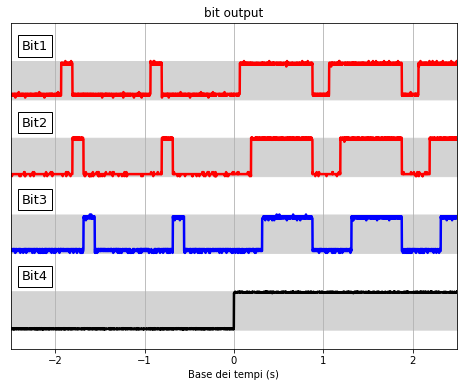

In [243]:
plotLogicLevelNoClock(sig_1_D4/sig_1_D4.max(), "Bit1", sig_2_D4/sig_2_D4.max(), "Bit2", sig_3_D4/sig_3_D4.max(), "Bit3", sig_4_D4/sig_4_D4.max(), "Bit4", 
                            time_1_D4,time_1_D4[0], time_1_D4[len(time_1_D4)-1], titl = 'bit output')

In [237]:
CH1_D5 = openTek(f'{DATADIR}/26-10-21/ALL0011/F0011CH1.CSV')
CH2_D5 = openTek(f'{DATADIR}/26-10-21/ALL0011/F0011CH2.CSV')
CH3_D5 = openTek(f'{DATADIR}/26-10-21/ALL0011/F0011CH3.CSV')
CH4_D5 = openTek(f'{DATADIR}/26-10-21/ALL0011/F0011CH4.CSV')

time_1_D5 = CH1_D5['Data'].to_numpy().transpose()[0]   
sig_1_D5 = CH1_D5['Data'].to_numpy().transpose()[1]  
time_2_D5 = CH2_D5['Data'].to_numpy().transpose()[0]   
sig_2_D5 = CH2_D5['Data'].to_numpy().transpose()[1]
time_3_D5 = CH3_D5['Data'].to_numpy().transpose()[0]   
sig_3_D5 = CH3_D5['Data'].to_numpy().transpose()[1]
time_4_D5 = CH4_D5['Data'].to_numpy().transpose()[0]   
sig_4_D5 = CH4_D5['Data'].to_numpy().transpose()[1]


<AxesSubplot:title={'center':'bit output'}, xlabel='Base dei tempi (s)'>

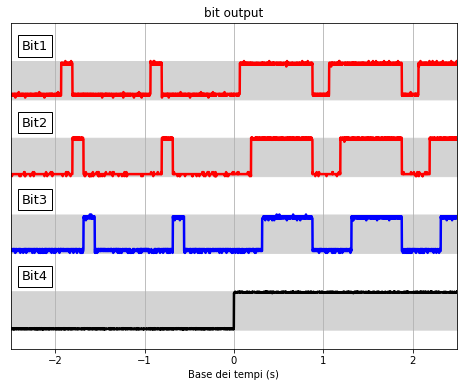

In [244]:
plotLogicLevelNoClock(sig_1_D5/sig_1_D5.max(), "Bit1", sig_2_D5/sig_2_D5.max(), "Bit2", sig_3_D5/sig_3_D5.max(), "Bit3", sig_4_D5/sig_4_D4.max(), "Bit4", 
                            time_1_D5,time_1_D5[0], time_1_D5[len(time_1_D5)-1], titl = 'bit output')